In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('JoinedEvent2_CB2016_subset_800m.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,weekday,O_date,O_hour
0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,40.68981,...,Subscriber,1971.0,2,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16


In [4]:
d = pd.DataFrame(df.groupby(['O_date','Event_type','O_hour'],as_index=False).size())
d.reset_index(inplace=True)
d.columns = ['O_date','Event_type','O_hour','Count']
d.head()

,O_date,Event_type,O_hour,Count
0,2016-01-01,no-event,16,8
1,2016-01-01,no-event,17,7
2,2016-01-01,no-event,18,4
3,2016-01-01,no-event,19,2
4,2016-01-01,no-event,20,2


In [5]:
d['month'] = pd.to_datetime(d['O_date']).dt.month

In [6]:
d.head()

,O_date,Event_type,O_hour,Count,month
0,2016-01-01,no-event,16,8,1
1,2016-01-01,no-event,17,7,1
2,2016-01-01,no-event,18,4,1
3,2016-01-01,no-event,19,2,1
4,2016-01-01,no-event,20,2,1


In [34]:
d[d['Event_type']=='hockey'].groupby('month').mean()

,O_hour,Count
month,,
3,19.5,12.375000
9,19.5,58.875000
10,19.5,39.857143
11,19.5,40.718750
12,19.5,22.265625


In [18]:
m = pd.DataFrame(d.groupby(['Event_type','O_hour']).mean())
m.reset_index(inplace=True)
m.head()

,Event_type,O_hour,Count,month
0,basketball,16,19.916667,6.333333
1,basketball,17,23.877551,6.244898
2,basketball,18,32.530612,6.244898
3,basketball,19,25.448980,6.244898
4,basketball,20,19.795918,6.244898


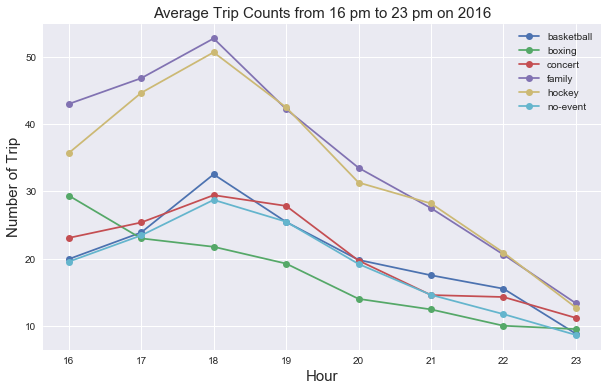

In [21]:
pl.figure(figsize=(10,6))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
#ax = sns.barplot(x="Month", y='Count',hue='Type',data=e)
for i in m['Event_type'].unique():
    if i == 'other':
        break
    #sns.barplot(x="O_hour", y='Count',data=m[m['Event_type']==i])
    pl.plot(m[m['Event_type']==i]['O_hour'],m[m['Event_type']==i]['Count'],'o-',label=i)
pl.legend()
pl.xlabel('Hour',size=15)
pl.ylabel('Number of Trip',size=15)
pl.title('Average Trip Counts from 16 pm to 23 pm on 2016',size=15)
pl.savefig('AvgTripHour_2016.png',dpi=300)

In [22]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,weekday,O_date,O_hour
0,173,16:03:10,16:06:03,243,Fulton St & Rockwell Pl,40.688226,-73.979382,241,DeKalb Ave & S Portland Ave,40.689810,...,Subscriber,1971.0,2,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
1,136,16:05:54,16:08:11,420,Clermont Ave & Lafayette Ave,40.687645,-73.969689,270,Adelphi St & Myrtle Ave,40.693083,...,Subscriber,1980.0,1,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
2,653,16:13:47,16:24:40,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,278,Concord St & Bridge St,40.697666,...,Subscriber,1976.0,1,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
3,659,16:13:47,16:24:46,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,278,Concord St & Bridge St,40.697666,...,Subscriber,1985.0,2,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16
4,1419,16:20:39,16:44:19,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,532,S 5 Pl & S 4 St,40.710451,...,Subscriber,1993.0,1,2016-01-01,2016-01-01,no-event,NaN,NaN,2016-01-01,16


In [23]:
df = df[df['O_hour']>18]

In [34]:
tem = df[['O_date','Event_type']]

In [49]:
d_bydate = pd.DataFrame(df.groupby(['O_date','start station id']).size())
d_bydate.reset_index(inplace=True)

In [50]:
d_bydate.head()

,O_date,start station id,0
0,2016-01-01,83,1
1,2016-01-01,243,1
2,2016-01-01,274,1
3,2016-01-01,353,1
4,2016-01-01,397,2


In [44]:
len(d_bydate.O_date.unique())

362

In [51]:
len(d_bydate['start station id'].unique())

20

In [58]:
stat = d_bydate['start station id'].unique()
dat = d_bydate.O_date.unique()

In [59]:
M = np.zeros([20,362])

In [74]:
M

array([[ 1.,  2.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [69]:
d_bydate[(d_bydate['O_date'] == '2016-01-01') & (d_bydate['start station id'] == 83)][0].values[0]

1

In [76]:
for i in range(20):
    for j in range(362):
        d = dat[j]
        s = stat[i]
        
        #M[i][j] = 
        print(d_bydate[(d_bydate['O_date'] == d) & (d_bydate['start station id'] == s)][0].values[0])
        print(i,s,j,d)

1
(0, 83, 0, '2016-01-01')
2
(0, 83, 1, '2016-01-02')
5
(0, 83, 2, '2016-01-03')
4
(0, 83, 3, '2016-01-04')
4
(0, 83, 4, '2016-01-05')
5
(0, 83, 5, '2016-01-06')
9
(0, 83, 6, '2016-01-07')
7
(0, 83, 7, '2016-01-08')
3
(0, 83, 8, '2016-01-09')
4
(0, 83, 9, '2016-01-10')
4
(0, 83, 10, '2016-01-11')
8
(0, 83, 11, '2016-01-12')
10
(0, 83, 12, '2016-01-13')
14
(0, 83, 13, '2016-01-14')
5
(0, 83, 14, '2016-01-15')
6
(0, 83, 15, '2016-01-16')
3
(0, 83, 16, '2016-01-17')
1
(0, 83, 17, '2016-01-18')
2
(0, 83, 18, '2016-01-19')
5
(0, 83, 19, '2016-01-20')
5
(0, 83, 20, '2016-01-21')
6
(0, 83, 21, '2016-01-22')
1
(0, 83, 22, '2016-01-27')
6
(0, 83, 23, '2016-01-28')
4
(0, 83, 24, '2016-01-29')
3
(0, 83, 25, '2016-01-30')
1
(0, 83, 26, '2016-01-31')
8
(0, 83, 27, '2016-02-01')
10
(0, 83, 28, '2016-02-02')
7
(0, 83, 29, '2016-02-03')
6
(0, 83, 30, '2016-02-04')
6
(0, 83, 31, '2016-02-05')
3
(0, 83, 32, '2016-02-06')
7
(0, 83, 33, '2016-02-07')
15
(0, 83, 34, '2016-02-08')
4
(0, 83, 35, '2016-02-09'

IndexError: index 0 is out of bounds for axis 0 with size 0

In [35]:
tem.head()

,O_date,Event_type
19,2016-01-01,no-event
20,2016-01-01,no-event
21,2016-01-01,no-event
22,2016-01-01,no-event
23,2016-01-01,no-event


In [40]:
d_bydate = d_bydate.merge(tem,on='O_date',how='left').drop_duplicates()

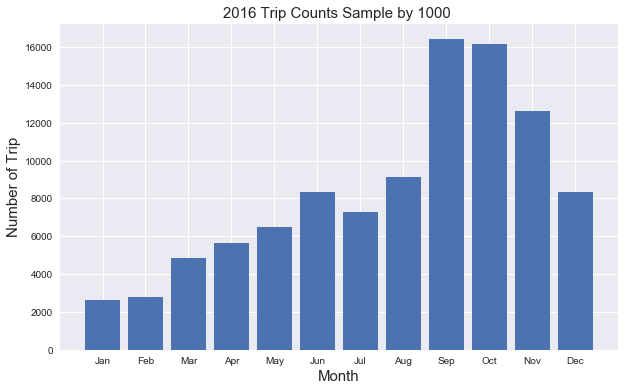

In [83]:
pl.figure(figsize=(10,6))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
#ax = sns.barplot(x="Month", y='Count',hue='Type',data=e)
#for i in m['Event_type'].unique():
#    if i == 'other':
#        break
    #sns.barplot(x="O_hour", y='Count',data=m[m['Event_type']==i])
#    pl.plot(m[m['Event_type']==i]['O_hour'],m[m['Event_type']==i]['Count'],'o-',label=i)
Xl = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
X = range(12)
Y = [2653, 2765, 4848, 5643, 6471, 8330, 7257, 9131, 16417, 16179, 12619, 8353]
pl.bar(X,Y)
#pl.legend()
pl.xticks(arange(12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec') )
pl.xlabel('Month',size=15)
pl.ylabel('Number of Trip',size=15)
pl.title('2016 Trip Counts Sample by 1000 ',size=15)
#pl.savefig('AvgTripHour_2016.png',dpi=300)